In [7]:
import requests
import pandas as pd
from bs4 import BeautifulSoup as bs
from tqdm import tqdm
import numpy as np
import time

In [6]:
# A .csv file with boardgame ratings was downloaded from BGG (https://boardgamegeek.com/data_dumps/bg_ranks)

df = pd.read_csv('boardgames_ranks.csv')
cols_to_drop = ['abstracts_rank', 'cgs_rank', 'childrensgames_rank',
       'familygames_rank', 'partygames_rank', 'strategygames_rank',
       'thematic_rank', 'wargames_rank']

# Dropping the columns with ratings by category and limit it to 5000 entries
df = df.drop(columns=cols_to_drop)
df = df[:5000]
df

In [8]:
# categories for the boardgame dataframe
col = ['name', 'weight', 'minplayers', 'maxplayers', 'minplaytime', 'maxplaytime', 'age', 'category', 'mechanic']
d = {i: [] for i in col}

# scraping info on the top-5000 boardgames
for game_id in tqdm(list(df['id'][:5000])):
    url = f'https://api.geekdo.com/xmlapi/boardgame/{game_id}?stats=1'
    res = requests.get(url)
    soup = bs(res.text, 'lxml')
    categories = []
    mechanics = []
    
    d['name'].append(soup.find('name', attrs={'primary': 'true'}).text)
    d['weight'].append(soup.select('averageweight')[0].text)
    d['minplayers'].append(soup.select('minplayers')[0].text)
    d['maxplayers'].append(soup.select('maxplayers')[0].text)
    d['minplaytime'].append(soup.select('minplaytime')[0].text)
    d['maxplaytime'].append(soup.select('maxplaytime')[0].text)
    d['age'].append(soup.select('age')[0].text)
    
    for cat in soup.select('boardgamecategory'):
        categories.append((cat.text))
    d['category'].append(categories)
    
    for mech in soup.select('boardgamemechanic'):
        mechanics.append((mech.text))
    d['mechanic'].append(mechanics)
    
    if len(d['name'])%100 ==0:
        df2 = pd.DataFrame(data=d, columns=col)
        df2.to_csv('bgg.csv', index=False)
        time.sleep(5)

In [14]:
# combining the dataframes and saving the .csv file
df_combined = pd.concat([df, df2.drop('name', axis=1)], axis=1)
df_combined.to_csv('bgg_top5000.csv', index=False)

In [16]:
df = pd.read_csv("bgg_top5000.csv")
df

,id,name,yearpublished,rank,bayesaverage,average,usersrated,weight,minplayers,maxplayers,minplaytime,maxplaytime,age,category,mechanic
0,224517,Brass: Birmingham,2018,1,8.41611,8.59849,45505,3.8809,2,4,60,120,14,"['Age of Reason', 'Economic', 'Industry / Manu...","['Hand Management', 'Income', 'Loans', 'Market..."
1,161936,Pandemic Legacy: Season 1,2015,2,8.38079,8.52838,53369,2.8315,2,4,60,60,13,"['Environmental', 'Medical']","['Action Points', 'Cooperative Game', 'Hand Ma..."
2,174430,Gloomhaven,2017,3,8.35418,8.59040,62022,3.9112,1,4,60,120,14,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Action Queue', 'Action Retrieval', 'Campaign..."
3,342942,Ark Nova,2021,4,8.33397,8.53500,43007,3.7593,1,4,90,150,14,"['Animals', 'Economic', 'Environmental']","['Action Queue', 'End Game Bonuses', 'Hand Man..."
4,233078,Twilight Imperium: Fourth Edition,2017,5,8.24169,8.60196,23644,4.3152,3,6,240,480,14,"['Civilization', 'Economic', 'Exploration', 'N...","['Action Drafting', 'Area-Impulse', 'Dice Roll..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,249582,The Dark Summer: Normandy 1944,2021,4996,5.74559,7.88088,273,2.8667,1,2,480,480,0,"['Wargame', 'World War II']","['Chit-Pull System', 'Dice Rolling']"
4996,963,The Gardens of the Alhambra,1993,4997,5.74555,6.15148,1370,1.7913,2,4,45,60,8,['Abstract Strategy'],"['Area Majority / Influence', 'Tile Placement']"
4997,72644,Perplexus,2001,4998,5.74546,6.94747,442,1.5000,1,1,30,30,6,"['Action / Dexterity', 'Maze']",[]
4998,97273,Upon a Salty Ocean,2011,4999,5.74544,6.47869,712,2.8971,2,4,120,120,13,"['Economic', 'Nautical', 'Renaissance']","['Action Points', 'Variable Phase Order']"


In [25]:
import seaborn as sns

In [27]:
df['yearpublished'].value_counts()

2019    397
2018    350
2017    345
2021    307
2016    307
       ... 
1475      1
1920      1
1906      1
1946      1
1968      1
Name: yearpublished, Length: 100, dtype: int64

<Axes: xlabel='usersrated', ylabel='weight'>

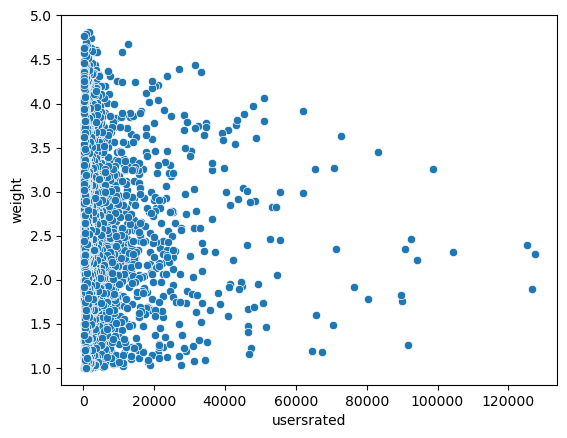

In [38]:
sns.scatterplot(data = df[df['yearpublished'] > 1990], x = 'usersrated', y='weight')

In [30]:
df.describe()

,id,yearpublished,rank,bayesaverage,average,usersrated,weight,minplayers,maxplayers,minplaytime,maxplaytime,age
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,172314.120800,2007.544600,2500.500000,6.241855,7.163070,4127.643800,2.377748,1.852600,5.176600,60.379400,104.84480,10.924200
std,118170.301472,100.159239,1443.520003,0.481925,0.530364,8661.441752,0.804878,0.723725,7.433442,114.240208,344.81844,2.824473
min,1.000000,-2200.000000,1.000000,5.745400,5.979120,200.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,42936.500000,2009.000000,1250.750000,5.869518,6.762605,804.750000,1.812275,1.000000,4.000000,30.000000,30.00000,10.000000
50%,179976.500000,2016.000000,2500.500000,6.081170,7.120515,1576.500000,2.298850,2.000000,4.000000,45.000000,60.00000,12.000000
75%,268870.500000,2019.000000,3750.250000,6.480685,7.510030,3553.500000,2.906300,2.000000,5.000000,60.000000,100.00000,13.000000
max,414317.000000,2024.000000,5000.000000,8.416110,9.165010,127464.000000,4.812500,8.000000,100.000000,5400.000000,12000.00000,18.000000


In [32]:
df[df['yearpublished'] < 1950]

,id,name,yearpublished,rank,bayesaverage,average,usersrated,weight,minplayers,maxplayers,minplaytime,maxplaytime,age,category,mechanic
46,521,Crokinole,1876,47,7.76337,8.03499,17909,1.2313,2,4,30,30,8,['Action / Dexterity'],"['Flicking', 'Team-Based Game']"
213,188,Go,-2200,214,7.31398,7.65239,17254,3.9303,2,2,30,180,8,['Abstract Strategy'],"['Enclosure', 'Square Grid']"
447,171,Chess,1475,448,7.01116,7.20676,36466,3.6556,2,2,0,0,6,['Abstract Strategy'],"['Grid Movement', 'Once-Per-Game Abilities', '..."
715,2398,Cribbage,1630,716,6.78522,7.09243,10097,1.9027,2,6,30,30,10,['Card Game'],['Hand Management']
827,45,Perudo,1800,828,6.71640,6.91572,15169,1.2536,2,6,15,30,8,"[""Children's Game"", 'Dice', 'Movies / TV / Rad...","['Betting and Bluffing', 'Dice Rolling', 'Play..."
942,2093,Mahjong,1850,943,6.64897,7.04704,7577,2.5720,3,4,120,120,8,['Abstract Strategy'],"['Hand Management', 'Set Collection']"
988,2181,Bridge,1925,989,6.61743,7.46280,3117,3.8875,4,4,60,60,12,['Card Game'],"['Hand Management', 'Predictive Bid', 'Score-a..."
1278,1115,Poker,1810,1279,6.46884,6.71309,11066,2.4222,2,10,60,60,12,"['Bluffing', 'Card Game']","['Betting and Bluffing', 'Player Elimination',..."
1476,30618,Eat Poop You Cat,0,1477,6.38490,7.45940,1712,1.1092,3,99,20,20,0,"['Humor', 'Party Game']","['Drawing', 'Paper-and-Pencil']"
1510,2397,Backgammon,1630,1511,6.36883,6.56357,14070,2.0122,2,2,30,30,8,"['Abstract Strategy', 'Dice']","['Betting and Bluffing', 'Dice Rolling', 'Race..."


In [35]:
df[df['minplayers'] == 0]

,id,name,yearpublished,rank,bayesaverage,average,usersrated,weight,minplayers,maxplayers,minplaytime,maxplaytime,age,category,mechanic
3187,21804,Traditional Card Games,0,3188,5.94766,6.80406,1167,1.9342,0,0,0,0,0,"['Card Game', 'Game System']",[]
3534,18291,Unpublished Prototype,0,3535,5.89722,6.86966,1103,2.5325,0,0,0,0,0,[],[]
3618,37301,Decktet,2008,3619,5.88652,7.43062,528,1.9688,0,0,30,30,0,"['Card Game', 'Game System', 'Print & Play']",[]
4475,23953,Outside the Scope of BGG,0,4476,5.78815,6.73725,651,1.7037,0,0,0,0,0,[],[]
